# Sequential Graph

In [8]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [19]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: List[str]
    result:str

def agentName(state:AgentState)->AgentState:
    state['result']= f"Hi {state['name']}, "

    return state

def agentAge(state:AgentState)->AgentState:
    state['result']= state['result'] + f"your age is {state['age']} years old!"

    return state

def agentSkills(state:AgentState)->AgentState:
    state['result'] = state ['result'] + f" You have skills in: {', '.join(state['skills'][:-1])}, and {''.join(state['skills'][-1:])}"
    
    return state

graph = StateGraph(AgentState)

graph.add_node('agentName', agentName)
graph.add_node('agentAge', agentAge)
graph.add_node('agentSkills', agentSkills)

graph.add_edge('agentName','agentAge')
graph.add_edge('agentAge','agentSkills')
graph.set_entry_point('agentName')
graph.set_finish_point('agentSkills')

app = graph.compile()

answer = app.invoke({'name':'yudhy', 'age':20, 'skills':['python', 'ai', 'ml', 'dl']})

answer['result']

'Hi yudhy, your age is 20 years old! You have skills in: python, ai, ml, and dl'

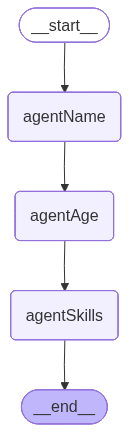

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))